In [ ]:
pip install swifter

     |████████████████████████████████| 296 kB 5.1 MB/s 
     |████████████████████████████████| 118 kB 50.2 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
pip install transformers

     |████████████████████████████████| 2.6 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 20.5 MB/s 
     |████████████████████████████████| 895 kB 46.8 MB/s 
     |████████████████████████████████| 636 kB 47.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for regex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from sklearn.decomposition import  LatentDirichletAllocation as LDA
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import torch
import transformers as ppb # pytorch transformers
import swifter
import tqdm
from transformers import DistilBertForSequenceClassification,DistilBertTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora, models
import seaborn as sn
from sklearn.metrics import confusion_matrix

import nltk
nltk.download('stopwords')
nltk.download('punkt') 


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def performance(y,y_predict,Name):
    print('Confusion matrix for',Name,'\n' )
    hm=sn.heatmap(confusion_matrix(y,y_predict), annot=True)
    plt.show()
    counter=0
    comp=[]
    for i in range(len(y)):
        if y[i]!=y_predict[i]:
            counter+=1
            comp.append(0)
        else:
            comp.append(1)

    comp=np.array(comp)
    score=(1-counter/len(y))*100
    print('Score',score,'%')
    return score

In [ ]:
data = pd.read_csv('IMDB-Sample.csv')
data=data[:2500]
print(data.shape)
data.head()

(2500, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
X = data["review"]
Y = data["sentiment"]
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2500 non-null   object
 1   sentiment  2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB


In [ ]:
data.sentiment.value_counts()

positive    1266
negative    1234
Name: sentiment, dtype: int64

In [ ]:
data.sentiment.replace('positive',1,inplace=True)
data.sentiment.replace('negative',0,inplace=True)
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [ ]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
#Remove HTML tags
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

data.review = data.review.apply(clean)
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
# Remove special characters
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

data.review = data.review.apply(is_special)
data.review[0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
#Convert everything to lowercase
def to_lower(text):
    return text.lower()

data.review = data.review.apply(to_lower)
data.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
#Remove stopwords
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words or w=='not']

data.review = data.review.apply(rem_stopwords)
data.review[0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'not',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'not',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes'

In [ ]:
#Stem words
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

data.review = data.review.apply(stem_txt)
data.review[0]

'one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust not show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci not high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker sid

In [ ]:
def vectorize():
    # Creating a corpus
    corpus = data.review
    
    # Creating the Bags of Words Model
    CountVec = CountVectorizer(ngram_range=(1,1))
    #transform
    Count_data = CountVec.fit_transform(corpus)
    #create dataframe
    BOW_dataframe=pd.DataFrame(Count_data.toarray())
    Y = CountVec.get_feature_names()
    
    yvec = data.sentiment.values
    yvecs = pd.DataFrame(yvec)
    #Encoding categorical data
    from sklearn.preprocessing import LabelEncoder
    labelencoder_y = LabelEncoder()
    yvec=labelencoder_y.fit_transform(yvec)
      

    #Td-if
    X_tf = TfidfVectorizer()
    X_tfd =  X_tf.fit_transform(corpus).toarray()
    X_tfd = pd.DataFrame(X_tfd)
    
    # Applying LDA
    lda = LDA(n_components = 10, max_iter=10, n_jobs = -1, batch_size=128, learning_decay=0.5)
    lda.fit_transform(BOW_dataframe)
    X_lda = lda.fit_transform(BOW_dataframe)
    X_LDa = pd.DataFrame(X_lda)

    return X_tfd, BOW_dataframe, X_LDa, corpus, CountVec, yvec, X_lda, Y

X_tfd,BOW_dataframe,X_LDa,corpus,CountVec,yvec,X_lda,Y =vectorize()

In [ ]:
class BertTokenizer(object):

    def __init__(self, text=[]):
        self.text = text

        # For DistilBERT:
        self.model_class, self.tokenizer_class, self.pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

        # Load pretrained model/tokenizer
        self.tokenizer = self.tokenizer_class.from_pretrained(self.pretrained_weights)

        self.model = self.model_class.from_pretrained(self.pretrained_weights)

    def get(self):

        df = pd.DataFrame(data={"text":self.text})
        tokenized = df["text"].swifter.apply((lambda x: self.tokenizer.encode(x, add_special_tokens=True)))
        
        #minimizing the length of the review not to be out of range
        for i in range(0,len(tokenized)):
          tokenized[i]=tokenized[i][0:100]

        max_len = 0
        for i in tokenized.values:
            if len(i) > max_len:
                max_len = len(i)

        padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = torch.tensor(padded)
        attention_mask = torch.tensor(attention_mask)

        with torch.no_grad(): last_hidden_states = self.model(input_ids, attention_mask=attention_mask)
        
        features = last_hidden_states[0][:, 0, :].numpy()

        return features

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [ ]:
_instance =BertTokenizer(text=X)
tokens = _instance.get()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
len(yvec)

2500

In [ ]:
def confusion_heatmap(y,y_pred):
  from sklearn.metrics import confusion_matrix
  #Get the confusion matrix
  cf_matrix = confusion_matrix(y, y_pred)

  #heatmap
  import seaborn as sns
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
def classification(X,y,Name):
    #Splitting training testing set
    trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)
    #Defining models and training them
    gnb,bnb = GaussianNB(),BernoulliNB(alpha=1.0,fit_prior=True)
    tree_clf = tree.DecisionTreeClassifier()
    rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
    svm_clf = svm.SVC()

    gnb.fit(trainx,trainy)
    bnb.fit(trainx,trainy)
    tree_clf.fit(trainx,trainy)
    rf_clf.fit(trainx,trainy)
    svm_clf.fit(trainx,trainy)

    #Prediction and accuracy metrics to choose best model
    ypg = gnb.predict(testx)
    ypb = bnb.predict(testx)
    ypt = tree_clf.predict(testx)
    ypr = rf_clf.predict(testx)
    yps = svm_clf.predict(testx)
    print("Feature engineering name = ",Name)
    print("Gaussian = ",accuracy_score(testy,ypg))
    print("Bernoulli = ",accuracy_score(testy,ypb))
    print("Tree = ",accuracy_score(testy,ypt))
    print("RandomForest = ",accuracy_score(testy,ypr))
    print("SVM = ",accuracy_score(testy,yps))
    print("SVM HeatMap with feature engineering = ",Name)
    confusion_heatmap(testy,yps)
    plt.figure()
    return gnb,bnb,tree_clf,rf_clf,svm_clf


Feature engineering name =  TFD
Gaussian =  0.636
Bernoulli =  0.816
Tree =  0.698
RandomForest =  0.81
SVM =  0.858
Feature engineering name =  LDA
Gaussian =  0.594
Bernoulli =  0.46
Tree =  0.57
RandomForest =  0.598
SVM =  0.604
Feature engineering name =  BOW
Gaussian =  0.612
Bernoulli =  0.816
Tree =  0.7
RandomForest =  0.806
SVM =  0.844
Feature engineering name =  PERT
Gaussian =  0.686
Bernoulli =  0.712
Tree =  0.57
RandomForest =  0.72
SVM =  0.78


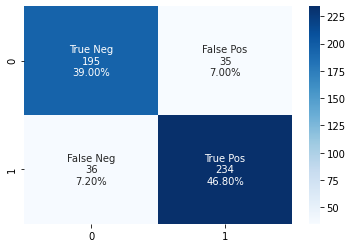

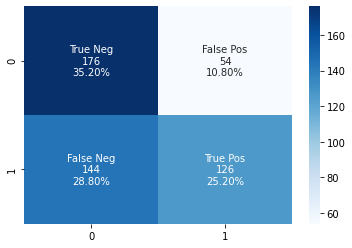

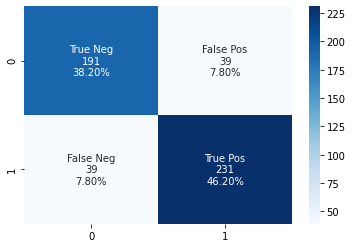

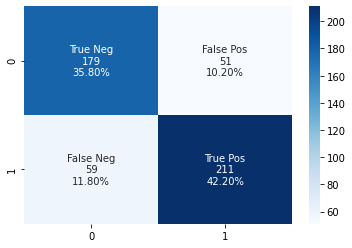

<Figure size 432x288 with 0 Axes>

In [ ]:
gnb_tfd,bnb_tfd,tree_tfd,rf_tfd,svm_tfd=classification(X_tfd,yvec,"TFD")
gnb_lda,bnb_lda,tree_lda,rf_lda,svm_lda=classification(X_LDa,yvec,"LDA")
gnb_bow,bnb_bow,tree_bow,rf_bow,svm_bow=classification(BOW_dataframe,yvec,"BOW")
gnb_pert,bnb_pert,tree_pert,rf_pert,svm_pert=classification(tokens,yvec,"PERT")

In [ ]:
def clustering(X,y,Name):
    
    modelkmeans = KMeans(n_clusters=2)
    modelkmeans.fit(X)
    kmeanspred = modelkmeans.fit_predict(X)
    c=0
    for i in range(len(y)):
        if y[i]==kmeanspred[i]:
            c+=1
    print("Kmeans = ",max(c/len(y),1-c/len(y))*100)

    aclustering = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
    aclusteringpred = aclustering.fit_predict(X)
    c=0
    for i in range(len(y)):
        if y[i]==aclusteringpred[i]:
            c+=1
    print("AClustering = ",max(c/len(y),1-c/len(y))*100)
    return modelkmeans,aclustering


In [ ]:
kmeans_tfd,aclus_tfd=clustering(X_tfd,yvec,"TFD")
kmeans_lda,aclus_lda=clustering(X_LDa,yvec,"LDA")
kmeans_bow,aclus_bow=clustering(BOW_dataframe,yvec,"BOW")
kmeans_bert,aclus_pert=clustering(tokens,yvec,"BERT")


Kmeans =  58.28
AClustering =  55.400000000000006
Kmeans =  61.040000000000006
AClustering =  55.67999999999999
Kmeans =  51.2
AClustering =  50.44
Kmeans =  51.72
AClustering =  51.72


In [ ]:
def kmeans_plot(kmeans_modelg,df,featurename):
  bow_pca = PCA(n_components=2)
  BowComponents = bow_pca.fit_transform(df)
  BowDf = pd.DataFrame(data = BowComponents, columns = [f"{featurename} component 1",f"{featurename} component 2"])

  bow_centers = bow_pca.transform(kmeans_modelg.cluster_centers_)

  n = BowComponents.shape[0]
  centers_old = np.zeros(bow_centers.shape) # to store old centers
  centers_new = deepcopy(bow_centers)

  clusters = np.zeros(n)
  distances = np.zeros((n,2))

  error = np.linalg.norm(centers_new - centers_old)

  while error != 0:
      # Measure the distance to every center
      for i in range(2):
          distances[:,i] = np.linalg.norm(BowComponents - bow_centers[i], axis=1)
      # Assign all training data to closest center
      clusters = np.argmin(distances, axis = 1)
      centers_old = deepcopy(centers_new)
      # Calculate mean for every cluster and update the center
      for i in range(2):
          centers_new[i] = np.mean(BowComponents[clusters == i], axis=0)
      error = np.linalg.norm(centers_new - centers_old)
  centers_new 
  centers_new = centers_new

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel(f'{featurename} Component 1', fontsize = 10)
  ax.set_ylabel(f'{featurename} Component 2', fontsize = 10)
  ax.set_title(f"2{featurename} component PCA", fontsize = 15)

  colors = ['y', 'r']  
  for color, i, target_name in zip(colors, [0, 1], ["Negative","Postive"]):
      ax.scatter(BowComponents[yvec == i, 0], BowComponents[yvec == i, 1], alpha=.8, color=color,
                  label=target_name, s = 10)
  ax.legend(loc='best', shadow=False, scatterpoints=1)
  ax.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='k', label = 'centroid', s=150)
  ax.grid()





In [ ]:
def kmeans_plot(kmeans_modelg,df,featurename):
  bow_pca = PCA(n_components=2)
  BowComponents = bow_pca.fit_transform(df)
  BowDf = pd.DataFrame(data = BowComponents, columns = [f"{featurename} component 1",f"{featurename} component 2"])

  bow_centers = bow_pca.transform(kmeans_modelg.cluster_centers_)

  n = BowComponents.shape[0]
  centers_old = np.zeros(bow_centers.shape) # to store old centers
  centers_new = deepcopy(bow_centers)

  clusters = np.zeros(n)
  distances = np.zeros((n,2))

  error = np.linalg.norm(centers_new - centers_old)

  while error != 0:
      # Measure the distance to every center
      for i in range(2):
          distances[:,i] = np.linalg.norm(BowComponents - bow_centers[i], axis=1)
      # Assign all training data to closest center
      clusters = np.argmin(distances, axis = 1)
      centers_old = deepcopy(centers_new)
      # Calculate mean for every cluster and update the center
      for i in range(2):
          centers_new[i] = np.mean(BowComponents[clusters == i], axis=0)
      error = np.linalg.norm(centers_new - centers_old)
  centers_new 
  centers_new = centers_new

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel(f'{featurename} Component 1', fontsize = 10)
  ax.set_ylabel(f'{featurename} Component 2', fontsize = 10)
  ax.set_title(f"2{featurename} component PCA", fontsize = 15)

  colors = ['y', 'r']  
  for color, i, target_name in zip(colors, [0, 1], ["Negative","Postive"]):
      ax.scatter(BowComponents[yvec == i, 0], BowComponents[yvec == i, 1], alpha=.8, color=color,
                  label=target_name, s = 10)
  ax.legend(loc='best', shadow=False, scatterpoints=1)
  ax.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='k', label = 'centroid', s=150)
  ax.grid()





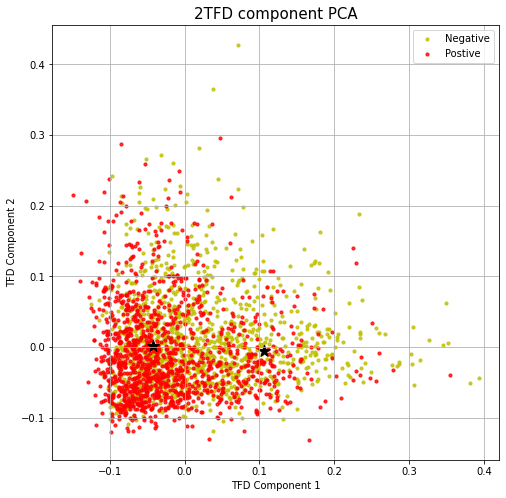

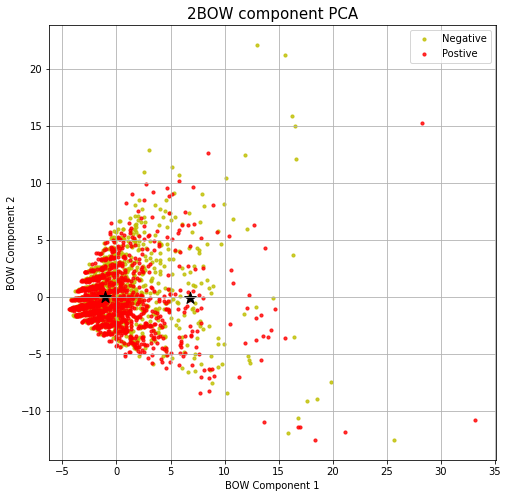

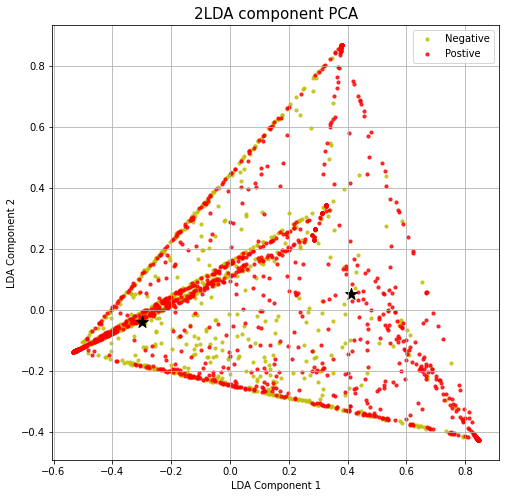

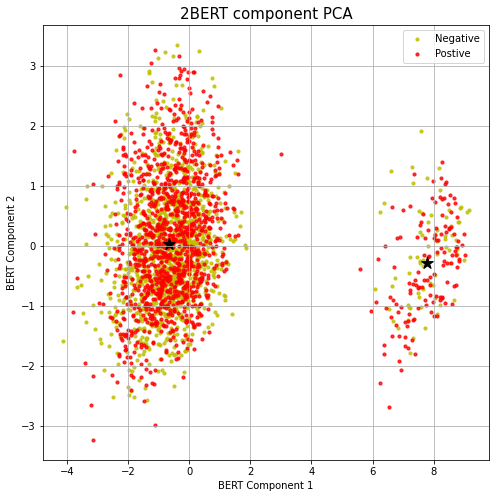

In [ ]:
kmeans_plot(kmeans_tfd,X_tfd,"TFD")
kmeans_plot(kmeans_bow,BOW_dataframe,"BOW")
kmeans_plot(kmeans_lda,X_LDa,"LDA")
kmeans_plot(kmeans_bert,tokens,"BERT")

In [ ]:
data_positives = data.loc[data['sentiment']==1]
data_negatives = data.loc[data['sentiment']==0]
X_positives = data_positives['review']
X_negatives = data_negatives['review']

In [ ]:
def wordCloud_(words):  
  df = words
  comment_words = ''
  stopwords = set(STOPWORDS)
    
  # iterate through the csv file
  for val in df:
        
      val = str(val)  
      # split the value
      tokens = val.split()
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
        
      comment_words += " ".join(tokens)+" "
    
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
    
  # plot the WordCloud image                       
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

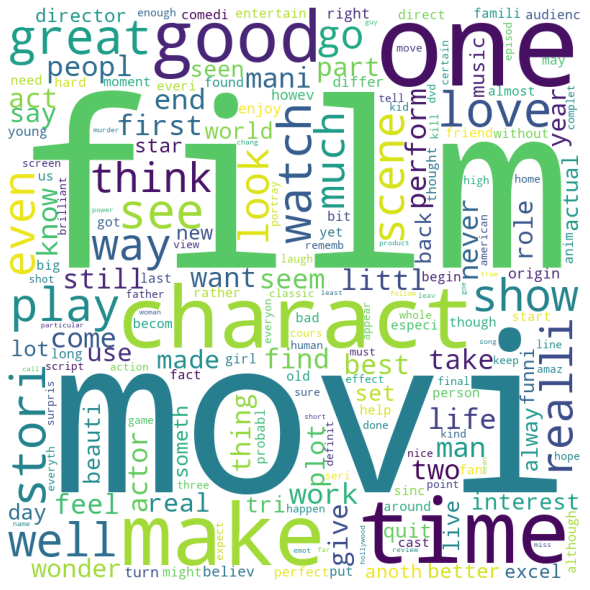

In [ ]:
wordCloud_(X_positives)

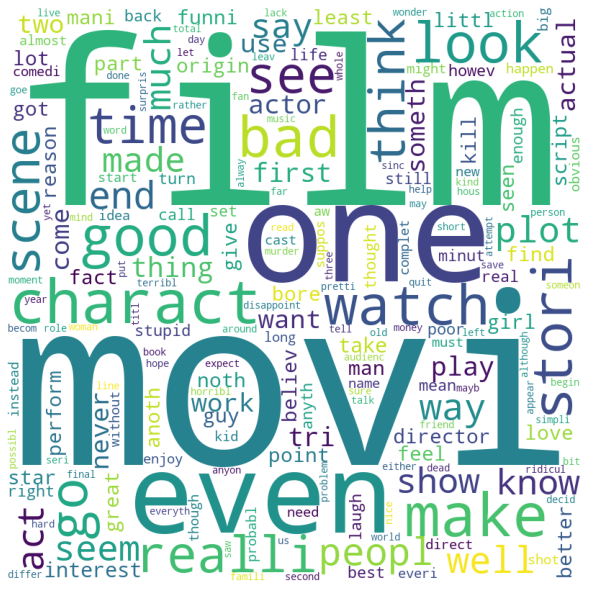

In [ ]:
wordCloud_(X_negatives)

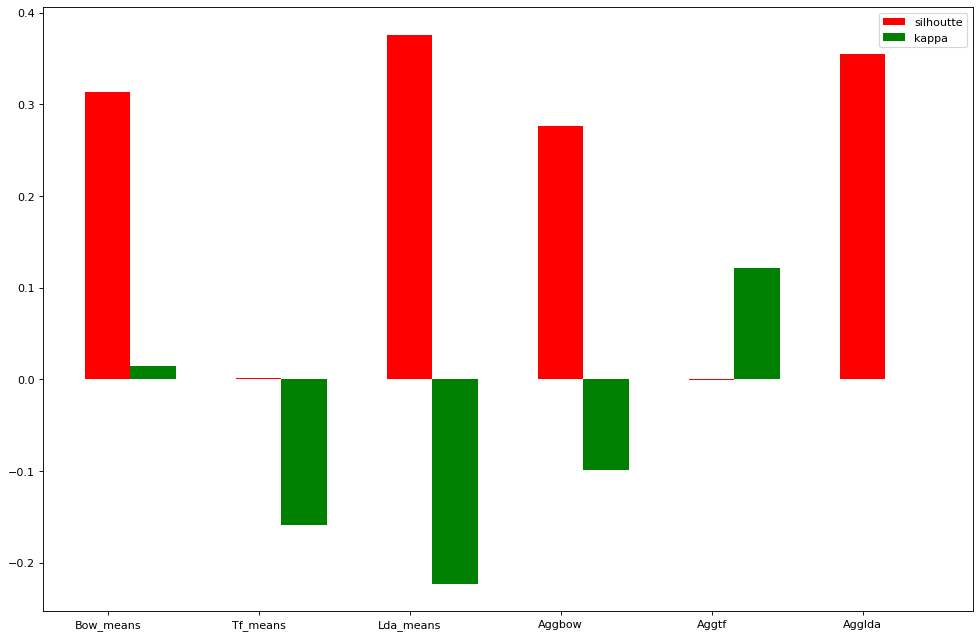

In [ ]:


#Bar graph
from sklearn.metrics import silhouette_score
from sklearn.metrics import cohen_kappa_score
kappa_tf_kmeans=cohen_kappa_score(kmeans_tfd.predict(X_tfd), yvec)
kappa_lda_kmeans=cohen_kappa_score(kmeans_lda.predict(X_LDa), yvec)
kappa_bow_kmeans=cohen_kappa_score(kmeans_bow.predict(BOW_dataframe), yvec)
# kappa_bert_bow=cohen_kappa_score(kmeans_bert.predict(tokens), yvec)
kappa_agg_tf=cohen_kappa_score(aclus_tfd.fit_predict(X_tfd), yvec)
kappa_agg_lda=cohen_kappa_score(aclus_lda.fit_predict(X_LDa), yvec)
kappa_agg_bow=cohen_kappa_score(aclus_bow.fit_predict(BOW_dataframe), yvec)
# kappa_agg_bert=cohen_kappa_score(aclus_bert.predict(tokens), yvec)

silhouette_bow_kmeans = (silhouette_score(BOW_dataframe, kmeans_bow.predict(BOW_dataframe), metric='euclidean'))
silhouette_lda_kmeans = (silhouette_score(X_LDa, kmeans_lda.predict(X_LDa), metric='euclidean'))
silhouette_tf_kmeans = (silhouette_score(X_tfd, kmeans_tfd.predict(X_tfd), metric='euclidean'))
silhouette_agg_bow = (silhouette_score(BOW_dataframe, aclus_bow.fit_predict(BOW_dataframe), metric='euclidean'))
silhouette_agg_lda = (silhouette_score(X_LDa, aclus_lda.fit_predict(X_LDa), metric='euclidean'))
silhouette_agg_tf = (silhouette_score(X_tfd, aclus_tfd.fit_predict(X_tfd), metric='euclidean'))



sil_df = [silhouette_bow_kmeans,silhouette_tf_kmeans,silhouette_lda_kmeans,silhouette_agg_bow,silhouette_agg_tf, silhouette_agg_lda]
kappa_df = [kappa_bow_kmeans,kappa_tf_kmeans,kappa_lda_kmeans,kappa_agg_tf,kappa_agg_lda,kappa_agg_bow]
N = 6
indi = np.arange(N)

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

plt.bar(indi, sil_df, width = 0.3, color='r', align = 'center', label = 'silhoutte')
plt.bar(indi+0.3, kappa_df, width = 0.3, color='g', align = 'center', label = 'kappa')
 
plt.xticks(indi+0.3)
plt.xticks(np.arange(N),('Bow_means', 'Tf_means', 'Lda_means', 'Aggbow', 'Aggtf', 'Agglda'))
plt.legend()

In [ ]:
corpus

0       one review mention watch 1 oz episod hook righ...
1       wonder littl product film techniqu unassum old...
2       thought wonder way spend time hot summer weeke...
3       basic famili littl boy jake think zombi closet...
4       petter mattei love time money visual stun film...
                              ...                        
2495    though structur total differ book tim krabbé w...
2496    handsom dash british airlin pilot georg taylor...
2497    film breech fine line satir silli bridg system...
2498    mardi gras made china provid wonder intric con...
2499    say realli feel pile steam dung begin film qua...
Name: review, Length: 2500, dtype: object

In [ ]:
bow_pca = PCA(n_components=2)
BowComponents = bow_pca.fit_transform(X_tfd)
trainx,testx,trainy,testy = train_test_split(BowComponents,yvec,test_size=0.2,random_state=9)

svm_clf = svm.SVC()

svm_pca=svm_clf.fit(trainx,trainy)


In [ ]:
BowComponents.max

<function ndarray.max>

In [ ]:
def plot_svm(clf,df,Name):
    
  bow_pca = PCA(n_components=2)
  BowComponents = bow_pca.fit_transform(df)
  trainx,testx,trainy,testy = train_test_split(BowComponents,yvec,test_size=0.2,random_state=9)

  svm_clf = svm.SVC()

  svm_pca=clf.fit(trainx,trainy)

  h = .02 
  x_min, x_max = BowComponents[:, 0].min() - 1, BowComponents[:, 0].max() + 1
  y_min, y_max = BowComponents[:, 1].min() - 1, BowComponents[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  titles = f"2{Name} component PCA"
  plt.subplot()
  Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(BowComponents[:, 0], BowComponents[:, 1], c=yvec, cmap=plt.cm.coolwarm)
  plt.xlabel('PCA component 0')
  plt.ylabel('PCA component 1')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles)

  plt.show()

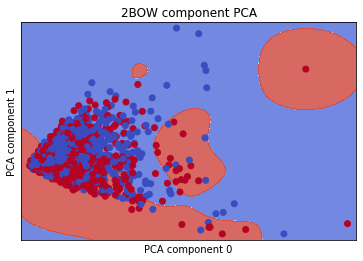

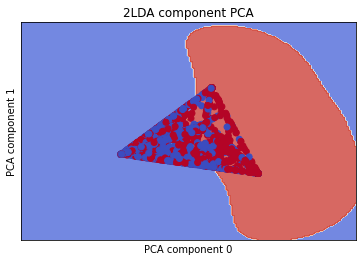

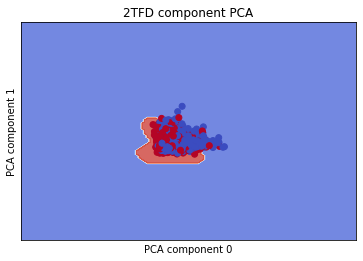

In [ ]:
plot_svm(svm_bow,BOW_dataframe,"BOW")
plot_svm(svm_lda,X_LDa,"LDA")
plot_svm(svm_tfd,X_tfd,"TFD")


In [ ]:
plot_svm(rf_bow,BOW_dataframe,"RandomForest BOW")
plot_svm(rf_lda,X_LDa,"RandomForest LDA")
plot_svm(rf_tfd,X_tfd,"RandomForest TFD")

In [ ]:
plot_svm(tree_bow,BOW_dataframe,"Tree BOW")
plot_svm(tree_lda,X_LDa,"Tree LDA")
plot_svm(tree_tfd,X_tfd,"Tree TFD")